<a href="https://colab.research.google.com/github/Firizki17/Machine-Learning/blob/main/Implementation_ROC_and_AUC_Firizki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementation ROC and AUC**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
url="https://raw.githubusercontent.com/Suji04/Diabetes-Detection/master/diabetes.csv"
data = pd.read_csv(url)
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2fo,random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_test = sc.transform(x_test)

In [15]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression(C=2)
model_logistic.fit(x_train,y_train)

y_pred_logistic = model_logistic.predict(x_test)

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=50)
dt.fit(x_train,y_train)

y_pred_tree = dt.predict_proba(x_test)

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(n_estimators=100)
rfr.fit(x_train,y_train)

y_pred_forest = rfr.predict_proba(x_test)

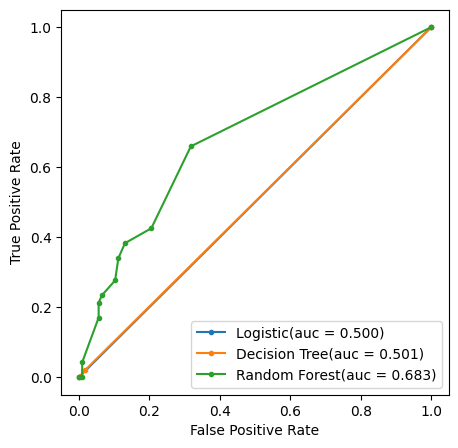

In [22]:
from sklearn.metrics import roc_curve,auc

logistic_fpr,logistic_tpr,threshold = roc_curve(y_test,y_pred_logistic)
auc_logistic = auc(logistic_fpr,logistic_tpr)

# Use y_pred_tree instead of y_pred_dt
dt_fpr,dt_tpr,threshold = roc_curve(y_test,y_pred_tree[:,1]) # Use index 1 instead of slice 1:2 to select the probability for class 1
auc_dt = auc(dt_fpr,dt_tpr)

# Use y_pred_forest instead of y_pred_rfr
rfr_fpr,rfr_tpr,threshold = roc_curve(y_test,y_pred_forest[:,1]) # Use index 1 instead of slice 1:2 to select the probability for class 1
auc_rfr = auc(rfr_fpr,rfr_tpr)

plt.figure(figsize=(5,5),dpi=100)
plt.plot(logistic_fpr,logistic_tpr,marker=".",label='Logistic(auc = %0.3f)'% auc_logistic) # Change 'maker' to 'marker'
plt.plot(dt_fpr,dt_tpr,marker=".",label='Decision Tree(auc = %0.3f)'% auc_dt) # Change 'maker' to 'marker'
plt.plot(rfr_fpr,rfr_tpr,marker=".",label='Random Forest(auc = %0.3f)'% auc_rfr) # Change 'maker' to 'marker'

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()